## BVP2 Exe 3 

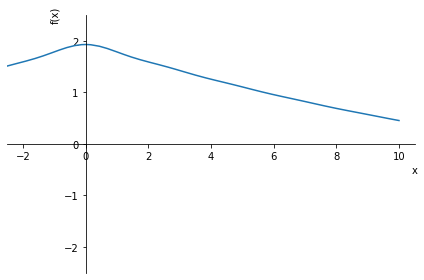

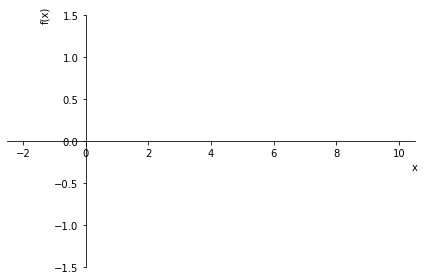

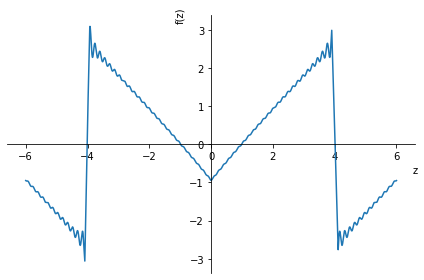

In [2]:
#Import all sympy module; enable us to work the equations 
#in the symbolic way. 
from sympy import *
#Import also the symbolic variables 'n' and 'x'
from sympy.abc import x, y, z, n, m, l, a
import numpy as np
import matplotlib.pyplot as plt
#from math import exp

#Set a,b,c as parameters for limit of integration 
#and beta as mean velocity value with dimensions of [km*s^-1].

a=31.2
b=31.2
c=4
beta=0.0001
H=10 #km
#Set the number of coeficients in the Fourier series.
enesima = 10

#Define the function f(x) as executable 
def f(z):
    f = z*exp(-z*0.1)
    return f

def dg(x):
    dg = ((np.pi)/(2*a))*sin(((np.pi)/(2*a))*x)
    return dg

def e(y):
    e = 1
    return e

def F(x,y,z):
    F = dg(x)*e(y)*f(z)
    return F


#Base con condiciones Neumann normalizada; componente x
varphi_i=np.sqrt(2/a)*cos((m*np.pi*x)/a)

#Base con condiciones Neumann normalizada; componente y
varphi_j=np.sqrt(2/b)*cos((n*np.pi*y)/b)

#Base con condiciones Mixtas normalizada; componente z
varphi_k=np.sqrt(2/c)*cos(((l+(1/2))*np.pi*z)/c)



#------------------Calculamos los coeficientes gi y ej----------------
#-----------considerando condiciones Neumann en las laterales-------
#dgi1=integrate(dg(x)*varphi_i,(x,0,a))
dgi1=(2*a)/((1+4*(m**2))*np.pi)

#ej1=integrate(e(y)*varphi_j,(y,0,b))
ej1=0

#-----------------Calculamos los coeficientes fk----------------------
#-----------considerando condiciones Mixtas en la vertical------------
#fk1=integrate(f(z)*varphi_k,(z,0,c))

#-----------------Coeficiente fk----------------------
#------considerando condiciones Mixtas en la vertical------------
#---........Establacemos parámetros necesarios--------
w2=((1/2)+l)*(np.pi/c)
gama=H/(1+(w2*H)**2)

#fk1=np.sqrt(2/c)*(((-1)**l)*gama*H*w2*exp(c/H)*(c+2*gama)-gama*(1+gama*H*w2))
fk1=np.sqrt(2/c)*gama*(((-1)**l)*c*H*w2*exp(-c/H)+gama*(1-(H*w2)**2))


#----------------------------SERIES&PLOTS------------------------------

#inf=float(integrate((1/a)*np.sqrt(2/a)*dg(x)**2,(x,0,a)))
#inic = np.sqrt(inf)
dg0 = integrate(np.sqrt(1/a)*dg(x),(x,0,a))
serie_dgm = dg0
for i in range(1,30):
    serie_dgm = serie_dgm + ((varphi_i*dgi1).subs(m,i))    
plot(serie_dgm, xlim=(-2.5, 10.5), ylim=(-2.5,2.5)) 

e0 = integrate(np.sqrt(1/b)*e(y),(y,0,b))
serie_en = e0
for j in range(1,30):
    serie_en = serie_en + ((varphi_j*ej1).subs(n,j))
#Usando el modulo para graficas de sympy
plot(serie_en, xlim=(-2.5, 10.5), ylim=(-1.5,1.5)) 

serie_fl = 0
for k in range(0,50):
    serie_fl = serie_fl + ((varphi_k*fk1).subs(l,k))
plot(serie_fl,(z,-6,6))


#----------------------Norma de F(x,y,z)------------------------------

#fc = integrate(F(x,y,z)**2,(x,0,a),(y,0,b),(z,0,c))
#normaF = np.sqrt(float(fc))
#print( 'La norma de F(x,y,z)=',F(x,y,z),' en la región xM=yM=20km por zM=5km es: ', normaF)

    
#----------------------Norma de Fmnl-----------------------------------
#Este código no funciona para este caso, sólo para casos sin series Neumann
#PAra series Neummann hay que corregir valores cruzados
#normaFmnl=((np.sqrt(a)*dg0)**2)*((np.sqrt(b)*e0)**2)
#for i in range(1,21):
#    for j in range(1,21): 
#        for k in range(0,40):
#            normaFmnl = normaFmnl + (((dgi1)**2).subs(m,i))*(((ej1)**2).subs(n,j))*(((fk1)**2).subs(l,k))
    #En cada paso va sumando la norma término a termino        
#print("La norma de la serie Fnml con m=n=l=20 es: ", float(sqrt(normaFmnl)))


In [3]:
#----------------------Norma de F-----------------------------------
dgc = integrate(dg(x)**2,(x,0,a))
normadg = np.sqrt(float(dgc))
print( 'La norma de dg(x)=',dg(x),' en el intervalo [ 0 ,',a,'] es: ', normadg)

ec = integrate(e(y)**2,(y,0,b))
normae = np.sqrt(float(ec))
print( 'La norma de e(y)=',e(y),' en el intervalo [ 0 ,',b,'] es: ', normae)

fc = integrate(f(z)**2,(z,0,c))
normaf = np.sqrt(float(fc))
print( 'La norma de f(z)=',f(z),' en el intervalo [ 0 ,',c,'] es: ', normaf)

normaF2 = normadg*normae*normaf                          
print("La norma de F(x,y,z) con m=n=l=20 es: ", float(normaF2))


#----------------------Norma de Fmnl-----------------------------------
norma_dgm=(dg0)**2
for i in range(1,21):
    norma_dgm = norma_dgm + (((dgi1)**2).subs(m,i))
print("\n\nLa norma de la serie dgm con m=20 es: ", float(sqrt(norma_dgm)))

norma_en=((np.sqrt(b)*e0)**2)
for j in range(1,21): 
    norma_en = norma_en + ((ej1)**2)#.subs(n,j))
print("La norma de la serie en con n=20 es: ", float(sqrt(norma_en)))    

norma_fl=0
for k in range(0,20):
    norma_fl = norma_fl + ((fk1)**2).subs(l,k)
print("La norma de la serie fl con l=20 es: ", float(sqrt(norma_fl)))    


normaFmnl2 = sqrt(norma_dgm)*sqrt(norma_en)*sqrt(norma_fl)                          
print("La norma de la serie Fnml con m=n=l=20 es: ", float(normaFmnl2))

La norma de dg(x)= 0.050346036115221*sin(0.050346036115221*x)  en el intervalo [ 0 , 31.2 ] es:  0.1988509097269515
La norma de e(y)= 1  en el intervalo [ 0 , 31.2 ] es:  5.585696017507576
La norma de f(z)= z*exp(-0.1*z)  en el intervalo [ 0 , 4 ] es:  3.4432033076588096
La norma de F(x,y,z) con m=n=l=20 es:  3.824437307051944


La norma de la serie dgm con m=20 es:  4.200644095740534
La norma de la serie en con n=20 es:  31.200000000000003
La norma de la serie fl con l=20 es:  2.703174626715917
La norma de la serie Fnml con m=n=l=20 es:  354.27832550665903


In [5]:
#Generamos tabla de comparación para medir la convergencia.
print('{:^10}{:^10}{:^10}{:^10}'.format('n,m,l','|F|','|F_mnl|','|F|-|F_mnl|'))
Pasos=0
for u in range(5):
    Pasos=Pasos+50
    
    norma_dgm=(np.sqrt(a)*dg0)**2
    for i in range(1,Pasos):
        norma_dgm = norma_dgm + (((dgi1)**2).subs(m,i))
    
    norma_en=((np.sqrt(b)*e0)**2)
    for j in range(1,Pasos): 
        norma_en = norma_en + ((ej1)**2)#.subs(n,j))           
    
    norma_fl=0
    for k in range(0,Pasos):
        norma_fl = norma_fl + ((fk1)**2).subs(l,k) 
    
    normaFmnl2 = sqrt(norma_dgm)*sqrt(norma_en)*sqrt(norma_fl)          
    
     #En cada paso va sumando la norma término a termino    
    convergencia = beta*(normaF2 - normaFmnl2)
    print('{:^10}{:^10.5f}{:^10.5f}{:^10.5f}'.format(Pasos,float(normaF2),normaFmnl2,convergencia))

  n,m,l      |F|     |F_mnl|  |F|-|F_mnl|
    50     3.82444  368.19314  -0.03644 
   100     3.82444  369.62437  -0.03658 
   150     3.82444  370.10019  -0.03663 
   200     3.82444  370.33787  -0.03665 
   250     3.82444  370.48041  -0.03667 


### Comparación de flujos y consistencia con el balance de masa para distintas condiciones de frontera

Para comparar la precisión con la cual los campos $\mathbf{v}$ con diferentes condiciones de frontera satisfacen la condición de continuidad podemos obtener el flujo de cada campo considerando una subregión del tipo $\Omega^{*}=(a,b)^{2}\times(c,d)$ con frontera $\Gamma^{*}$:
\begin{equation}
\mathcal{F}(\Gamma^{*},\mathbf{v})=\oint_{\Gamma^{*}} \mathbf{v} \cdot \mathbf{n}d\Gamma^{*}=\int_{\Omega^{*}}\nabla\cdot\mathbf{v}_{mnl}^{(1)}d\Omega,
\end{equation}

Podemos calcular esta divergencia recordando $\nabla\cdot \mathbf{v}^{(1)}_{mnl}=\beta(ef\dot{g}-e_{n}f_{l}\dot{g}_{m})$ y nos queda,

$$ 
\int_{\Omega^{*}}\nabla\cdot\mathbf{v}_{mnl}^{(1)}d\Omega = \beta\int_{0}^{x_{M}}\dot{g}dx\int_{0}^{y_{M}}edy\int_{0}^{z_{M}}fdz -\beta\left(\sum_{i}^{m}\dot{g}_{i}\int_{0}^{x_{M}}\varphi_{i}\right)\left(\sum_{j}^{n}e_{j}\int_{0}^{y_{M}}\varphi_{j}\right)\left(\sum_{k}^{l}f_{k}\int_{0}^{z_{M}}\varphi_{k}dz\right)
$$
Por lo que es posible calcular cada integral independientemente y luego multiplicar todopara obtener la diferencia.

#### Porcentaje de masa que fluye en la subregión.

Un mejor criterio es comparar la masa que fluye sobre la frontera $\Gamma^{*}$ de $\Omega^{*}$ con la masa en $M^{*}$ que hay en $\Omega^{*}$. De acuerdo con la condición de conservación, la masa es constante en la subregión $\Omega^{*}$ y está dada por $M_{t}^{*}=\rho V^{*}$. La masa transportada por el campo de velocidad $\mathbf{v}$ sobre la frontera $\Gamma^{*}$ a un tiempo $t$ es: 

\begin{equation}
M_{t}=t\rho\mathcal{F}(\Gamma^{*},\mathbf{v}).
\end{equation}

El porcentaje de masa que fluye sobre la frontera $\Gamma^{*}$ sobre lo que idealmente sería una masa constante es: 

\begin{equation}
\%M^{*}=100\frac{M^{*}_{t}}{M^{*}}=100\frac{t}{V^{*}}\mathcal{F}(\Gamma^{*},\mathbf{v})
\end{equation}

In [14]:
#-...-Límites de integración inicialización-------------------
xyM = 12
xym = 8
zM = 3
zm = 2

#-----------Calclulo de la integral de Fmnl2-----------------
for n in range(3):
    int_ser1=integrate(serie_dgm,(x,xym,xyM))
    int_ser2=integrate(serie_en,(y,xym,xyM))
    int_ser3=integrate(serie_fl,(z,zm,zM))
    int_Fmnl2 = int_ser1*int_ser2*int_ser3
    
#-------------Calclulo de la integral de F2------------------
    int_F2 = integrate(F(x,y,z),(x,xym,xyM),(y,xym,xyM),(z,zm,zM))
    flux_1 = beta*(int_F2-int_Fmnl2)
    
#------- ---Porcentaje de Masa que fluye en 3hr---------------

    PorcentajeMasa=(3*100*3600*abs(flux_1))/((xyM-xym)*(xyM-xym)*(zM-zm))
    
#---------------------Resultados------------------------------
    print('\n\n Flujo en la subregión (',xym,',',xyM,')^{2}x(',zm,',',zM,') --> ',flux_1)
    print(' %Masa que fluye en la subregión en 3hr   --> ',PorcentajeMasa)
    xyM = xyM + 4
    xym = xym - 4
    zM = zM + 1
    zm = zm - 1



 Flujo en la subregión ( 8 , 12 )^{2}x( 2 , 3 ) -->  -0.106191236199588*exp(-1/5) + 0.00203228186219013 + 0.115040505882887*exp(-3/10)
 %Masa que fluye en la subregión en 3hr   -->  -7167.90844347217*exp(-1/5) + 137.179025697834 + 7765.23414709485*exp(-3/10)


 Flujo en la subregión ( 4 , 16 )^{2}x( 1 , 4 ) -->  -0.847492168934672*exp(-1/10) + 0.053465927209178 + 1.07862639682595*exp(-2/5)
 %Masa que fluye en la subregión en 3hr   -->  -2118.73042233668*exp(-1/10) + 133.664818022945 + 2696.56599206487*exp(-2/5)


 Flujo en la subregión ( 0 , 20 )^{2}x( 0 , 5 ) -->  -1.76631075614849 + 3.0*exp(-1/2)
 %Masa que fluye en la subregión en 3hr   -->  -953.807808320182 + 1620.0*exp(-1/2)


In [ ]:
#-...-Límites de integración inicialización-------------------
xyM1 = 31.2
xym1 = 0
zM1 = 4
zm1 = 0

#-----------Calclulo de la integral de Fmnl2-----------------

int_ser1=integrate(serie_dgm,(x,xym1,xyM1))
int_ser2=integrate(serie_en,(y,xym1,xyM1))
int_ser3=integrate(serie_fl,(z,zm1,zM1))
int_Fmnl21 = int_ser1*int_ser2*int_ser3
    
#-------------Calclulo de la integral de F2------------------
int_F21 = integrate(F(x,y,z),(x,xym1,xyM1),(y,xym1,xyM1),(z,zm1,zM1))
flux_11 = beta*(int_F21-int_Fmnl21)
    
#------- ---Porcentaje de Masa que fluye en 3hr---------------

PorcentajeMasa1=(3*100*3600*abs(flux_11))/((xyM1-xym1)*(xyM1-xym1)*(zM1-zm1))
    
#---------------------Resultados------------------------------
print('\n\n Flujo en la subregión (',xym1,',',xyM1,')^{2}x(',zm1,',',zM1,') --> ',flux_11)
print(' %Masa que fluye en la subregión en 3hr   --> ',PorcentajeMasa1)